In [80]:
# Import necessary packages
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Setup Pandas
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Import necessary modules for deep leaning model
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping

In [3]:
train_df = pd.read_csv('train_df.csv')
test_df = pd.read_csv('test_df.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (25,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
train_df.head()

,parcelid,logerror,transactiondate,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,storytypeid,threequarterbathnbr,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear
0,10711738,0.027600,2016-08-02,0.0,3.0,4.0,8.0,0.0,1976.0,2538.0,6037.0,0.0,3.0,0.0,0.0,0.0,2.0,34220381.0,-118620802.0,11012.0,1.0,499.5,0.0,0.0,1.0,0101,261.0,LARE11,6.037113e+07,12447.0,3101.0,96339.0,0.0,0.0,0.0,1.0,0.0,0.0,1978.0,1.0,0,248918.0,575759.0,326841.0,7219.18,0,0.0
1,10711755,-0.018200,2016-08-02,0.0,3.0,3.0,8.0,0.0,1237.2,1589.0,6037.0,0.0,3.0,0.0,0.0,0.0,2.0,34222040.0,-118622240.0,11010.0,1.0,499.5,0.0,0.0,1.0,0101,261.0,LARE11,6.037113e+07,12447.0,3101.0,96339.0,0.0,0.0,0.0,1.0,0.0,0.0,1959.0,1.0,0,344938.0,553219.0,208281.0,6901.09,0,0.0
2,10711805,-0.100900,2016-05-03,0.0,2.0,3.0,8.0,0.0,1877.2,2411.0,6037.0,0.0,2.0,0.0,0.0,0.0,2.0,34220427.0,-118618549.0,11723.0,1.0,499.5,0.0,0.0,1.0,0101,261.0,LARE9,6.037113e+07,12447.0,3101.0,96339.0,0.0,0.0,0.0,1.0,0.0,0.0,1973.0,1.0,0,238699.0,390654.0,151955.0,4876.61,0,0.0
3,10711816,-0.012100,2016-04-05,0.0,2.0,4.0,8.0,0.0,1737.8,2232.0,6037.0,0.0,2.0,0.0,0.0,0.0,2.0,34222390.0,-118618631.0,9002.0,0.0,0.0,0.0,0.0,0.0,0100,261.0,LARE9,6.037113e+07,12447.0,3101.0,96339.0,0.0,0.0,0.0,1.0,0.0,0.0,1973.0,1.0,0,266309.0,443842.0,177533.0,5560.07,0,0.0
4,10711855,-0.007357,2017-07-07,0.0,2.0,3.0,8.0,0.0,1640.5,2107.0,6037.0,0.0,2.0,0.0,0.0,0.0,2.0,34222559.0,-118617387.0,9158.0,1.0,499.5,0.0,0.0,1.0,0101,261.0,LARE9,6.037113e+07,12447.0,3101.0,96339.0,0.0,0.0,0.0,1.0,0.0,0.0,1972.0,1.0,0,249655.0,624139.0,374484.0,7659.36,0,0.0


In [5]:
train_df.corr().logerror.sort_values(ascending=False)

logerror                        1.000000
calculatedfinishedsquarefeet    0.034686
finishedfloor1squarefeet        0.034473
bedroomcnt                      0.024873
taxdelinquencyyear              0.021867
bathroomcnt                     0.021284
fullbathcnt                     0.020333
garagetotalsqft                 0.013997
parcelid                        0.009595
garagecarcnt                    0.009176
roomcnt                         0.008574
lotsizesquarefeet               0.007811
threequarterbathnbr             0.007162
numberofstories                 0.006637
structuretaxvaluedollarcnt      0.006568
basementsqft                    0.006525
fips                            0.005484
rawcensustractandblock          0.005439
longitude                       0.005184
yearbuilt                       0.003849
fireplacecnt                    0.003003
storytypeid                     0.001198
regionidcity                   -0.000369
unitcnt                        -0.000797
decktypeid      

In [47]:
top = list(train_df.corr().logerror.sort_values(ascending=False).index[0:6])

In [48]:
bottom = list(train_df.corr().logerror.sort_values(ascending=False).index[-6:-1])

In [49]:
#Based on the correlation
smaller_df= train_df[top + bottom]

In [50]:
smaller_df.head()

,logerror,calculatedfinishedsquarefeet,finishedfloor1squarefeet,bedroomcnt,taxdelinquencyyear,bathroomcnt,regionidcounty,landtaxvaluedollarcnt,poolsizesum,pooltypeid7,poolcnt
0,0.027600,2538.0,1976.0,4.0,0.0,3.0,3101.0,326841.0,499.5,1.0,1.0
1,-0.018200,1589.0,1237.2,3.0,0.0,3.0,3101.0,208281.0,499.5,1.0,1.0
2,-0.100900,2411.0,1877.2,3.0,0.0,2.0,3101.0,151955.0,499.5,1.0,1.0
3,-0.012100,2232.0,1737.8,4.0,0.0,2.0,3101.0,177533.0,0.0,0.0,0.0
4,-0.007357,2107.0,1640.5,3.0,0.0,2.0,3101.0,374484.0,499.5,1.0,1.0


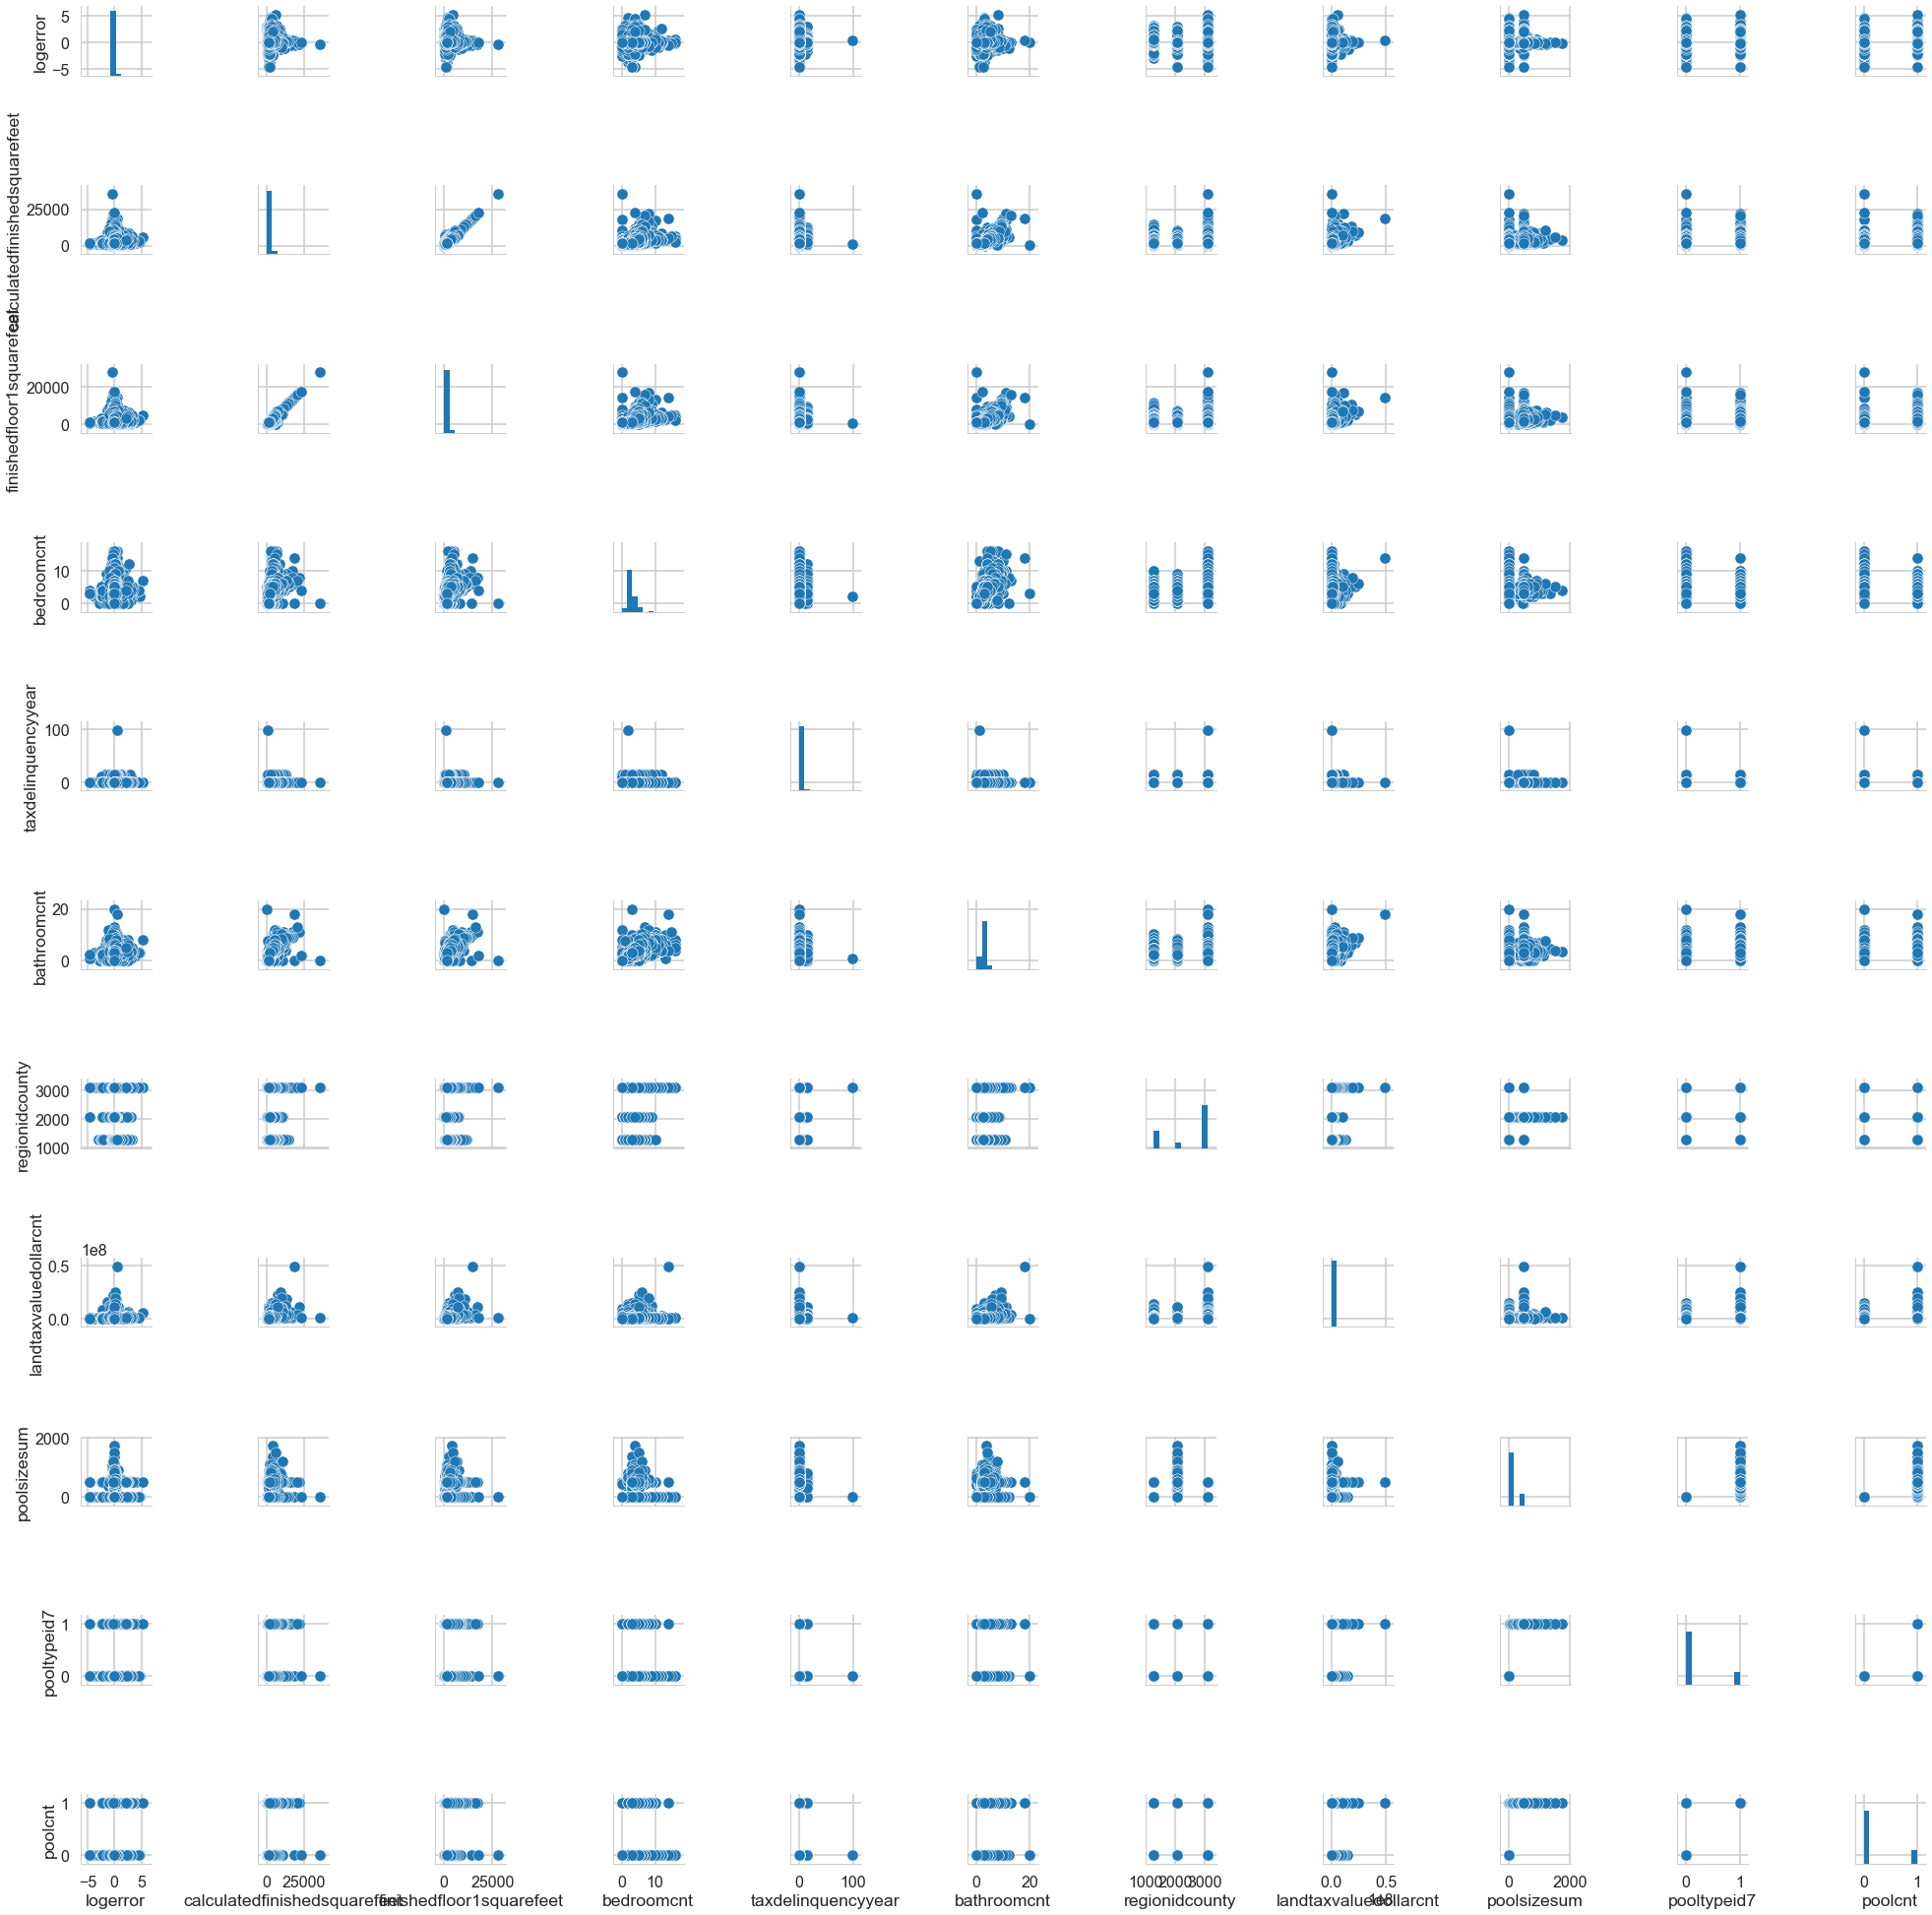

In [51]:
## Let's do a pairplot with seaborn to get a sense of the variables in this data set
sns.pairplot(smaller_df)

In [ ]:
props.select_dtypes(exclude=[object])

In [13]:
# Getting the data by dropping the object-typed data:
X_train = train_df.select_dtypes(exclude=[object]).drop(['logerror', 'parcelid'], axis=1)
y_train = train_df['logerror']
X_test = test_df.select_dtypes(exclude=[object]).drop(['logerror', 'parcelid'], axis=1)
y_test = test_df['logerror']

In [53]:
rf_model1 = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)
rf_model1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [54]:
rf1_test_pred = rf_model1.predict(X_test)

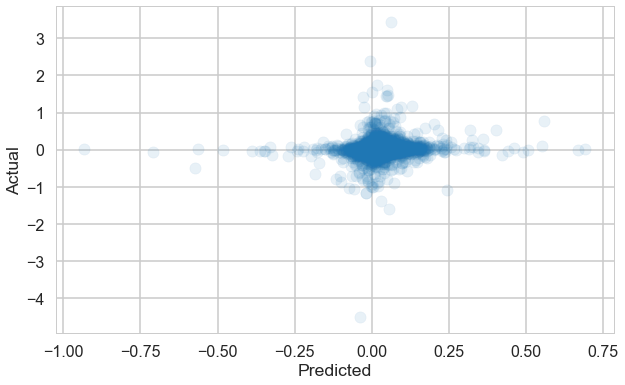

In [55]:
plt.figure(figsize=(10,6))
plt.scatter(rf1_test_pred,y_test,alpha=.1)
plt.xlabel("Predicted")
plt.ylabel("Actual");

In [14]:
def MAE(y, ypred):
    return np.sum([abs(y.iloc[i]-ypred[i]) for i in range(len(y))]) / len(y)

In [57]:
MAE(y_test, rf1_test_pred)

0.06829871594954381

In [58]:
# select the 5 most positive and negative features correlated to logerror for modeling:
X_train = train_df[top + bottom].drop(['logerror'], axis=1)
y_train = train_df['logerror']
X_test = test_df[top + bottom].drop(['logerror'], axis=1)
y_test = test_df['logerror']

In [60]:
rf_model2 = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)
rf_model2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [61]:
rf_test_pred2 = rf_model2.predict(X_test)

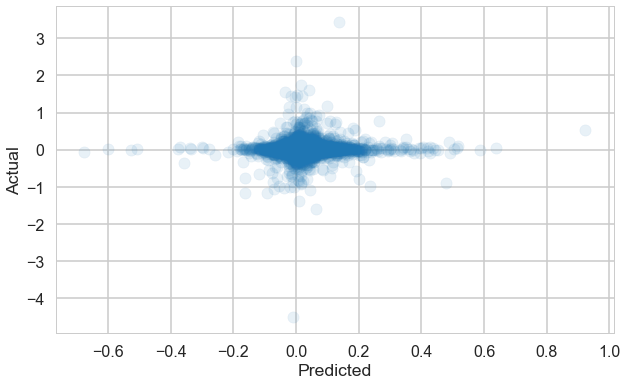

In [62]:
plt.figure(figsize=(10,6))
plt.scatter(rf_test_pred2,y_test,alpha=.1)
plt.xlabel("Predicted")
plt.ylabel("Actual");

In [63]:
MAE(y_test, rf_test_pred2)

0.0751842843800216

In [4]:
#columns are chosen based on EDA
col_name=['bathroomcnt', 'bedroomcnt', 'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet', 'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'lotsizesquarefeet', 
'roomcnt', 'threequarterbathnbr', 'yardbuildingsqft17', 'numberofstories', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount']

In [5]:
X_train = train_df[col_name]
y_train = train_df['logerror']
X_test = test_df[col_name]
y_test = test_df['logerror']

In [66]:
rf_model3 = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)
rf_model3.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [67]:
rf_test_pred3 = rf_model3.predict(X_test)

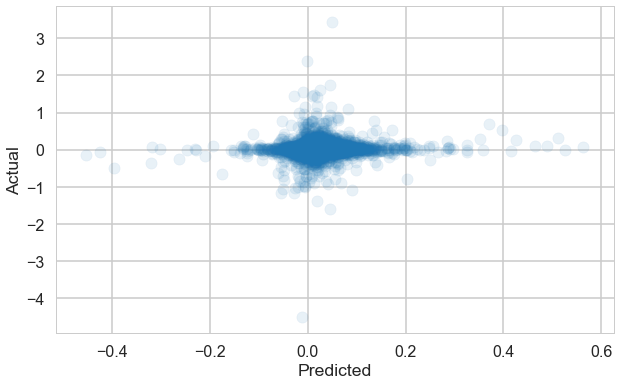

In [68]:
plt.figure(figsize=(10,6))
plt.scatter(rf_test_pred3,y_test,alpha=.1)
plt.xlabel("Predicted")
plt.ylabel("Actual");

In [69]:
MAE(y_test, rf_test_pred3)

0.0684424987168829

In [70]:
#Try linear regression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [71]:
lr_model.coef_, lr_model.intercept_

(array([-8.17495873e-04,  1.36154842e-04,  2.62943181e-06,  1.02585585e-05,
        -3.52872964e-03, -1.19961574e-03,  8.53725450e-05, -1.67453163e-06,
         1.50385130e-08,  5.81835390e-04,  7.64239738e-04, -1.58063203e-05,
        -1.31754085e-03,  1.48186560e-09,  6.41324282e-09,  4.93128667e-09,
        -1.80562503e-06]), 0.0044236848069549115)

In [72]:
test_set_pred = lr_model.predict(X_test)

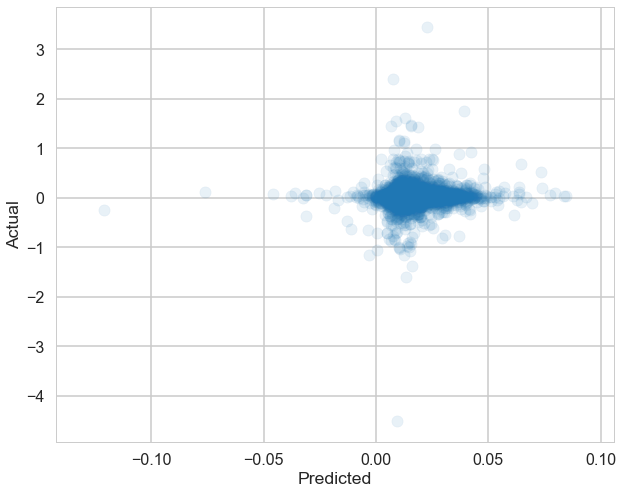

In [73]:
plt.figure(figsize=(10,8))
plt.scatter(test_set_pred,y_test,alpha=.1)
plt.xlabel("Predicted")
plt.ylabel("Actual");

In [74]:
MAE(y_test, test_set_pred)

0.06319091674707665

## Normalization 

In [7]:
scaler = Normalizer().fit(X_train)
normalized_X = scaler.transform(X_train)
normalized_X_test = scaler.transform(X_test)

In [76]:
lr_model.fit(normalized_X,y_train)
test_set_pred = lr_model.predict(normalized_X_test)
MAE(y_test, test_set_pred)

0.06362977440910964

In [8]:
rf_model4 = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)
rf_model4.fit(normalized_X, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [10]:
rf_test_pred4 = rf_model4.predict(normalized_X_test)

In [13]:
MAE(y_test, rf_test_pred4)

0.06837132118892476

In [16]:
# split the train data set into a training(90%) and validation set (10%)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


In [17]:
num_estimators = [10,20,40,100,200,400]
est_list = []
MAE_list = list()

for est in num_estimators:
    my_rf_model = RandomForestRegressor(n_estimators = est)
    my_rf_model.fit(X_train, y_train)
    y_pred = my_rf_model.predict(X_valid)
    mae = MAE(y_valid, y_pred)
    est_list.append(est)
    MAE_list.append(mae)

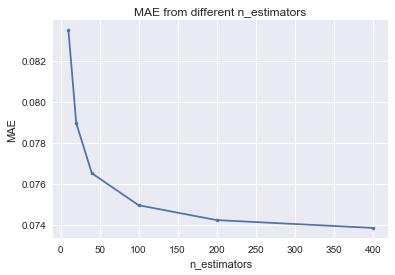

In [18]:
sns.set()

_ = plt.plot(est_list, MAE_list, marker='.')
_ = plt.title('MAE from different n_estimators')
_ = plt.xlabel('n_estimators')
_ = plt.ylabel('MAE')
plt.show()

In [19]:
print(my_rf_model.feature_importances_)

[2.74196153e-04 1.21536410e-02 1.98463434e-02 1.34098258e-02
 3.39005509e-04 5.39896075e-02 5.77996097e-02 9.55817436e-04
 2.70389918e-03 9.33639847e-03 3.41403489e-03 1.57375133e-02
 9.74943744e-04 6.21341121e-03 9.10981024e-02 8.74805678e-02
 8.59183364e-02 3.19177875e-03 3.19737503e-03 1.65894303e-03
 6.83723044e-04 2.74046309e-03 9.30004929e-03 3.86169009e-02
 2.53927969e-02 1.16791822e-03 4.39288597e-02 6.61656139e-03
 7.32424891e-05 2.76280962e-03 3.64998432e-03 4.10437448e-03
 2.83088927e-04 5.75063490e-02 3.16680015e-03 9.08867464e-02
 6.92643608e-02 8.41761567e-02 7.88874801e-02 7.09798374e-03]


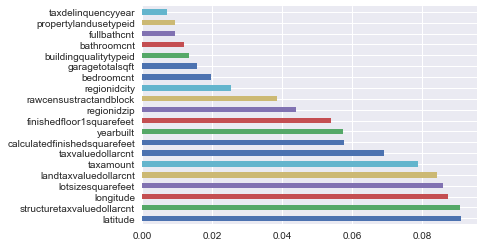

In [29]:
pd.Series(my_rf_model.feature_importances_, index=X_train.columns).nlargest(20).plot(kind='barh')

In [30]:
num_estimators = [10,20,40,100,200,400]
est_list = []
MAE_list = list()

for est in num_estimators:
    my_rf_model = RandomForestRegressor(n_estimators = est, n_jobs=-1)
    my_rf_model.fit(X_train, y_train)
    y_pred = my_rf_model.predict(X_valid)
    mae = MAE(y_valid, y_pred)
    est_list.append(est)
    MAE_list.append(mae)

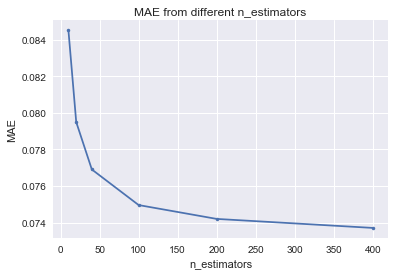

In [31]:
sns.set()

_ = plt.plot(est_list, MAE_list, marker='.')
_ = plt.title('MAE from different n_estimators')
_ = plt.xlabel('n_estimators')
_ = plt.ylabel('MAE')
plt.show()

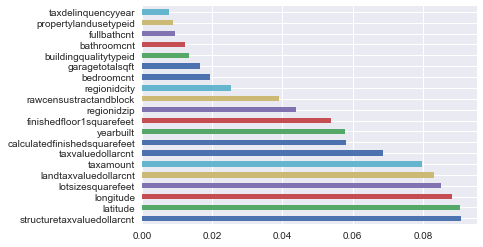

In [32]:
pd.Series(my_rf_model.feature_importances_, index=X_train.columns).nlargest(20).plot(kind='barh')

In [36]:
top_features = pd.Series(my_rf_model.feature_importances_, index=X_train.columns).nlargest(20).index

In [38]:
X_train = X_train[top_features]
X_valid = X_valid[top_features]

In [39]:
my_rf_model = RandomForestRegressor(n_estimators = 400, n_jobs=-1)
my_rf_model.fit(X_train, y_train)
y_pred = my_rf_model.predict(X_valid)
mae = MAE(y_valid, y_pred)

In [40]:
mae

0.07381004460853215

In [51]:
# convert the dataframe to NumPy matrix
predictors = X_train.values
target = y_train.values

In [52]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

In [69]:
# Specify the model
n_cols = predictors.shape[1]
input_shape = (n_cols,)
model1 = Sequential()
model1.add(Dense(1000, activation='relu', input_shape = input_shape))
model1.add(Dense(1000, activation='relu'))
model1.add(Dense(1))

# Compile the model
model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
model1.fit(predictors, target, validation_split=0.3,  epochs=10, callbacks=[early_stopping_monitor])

Train on 98815 samples, validate on 42350 samples
Epoch 1/10
98815/98815 [==============================] - 23s 232us/step - loss: 2255590046351.2866 - acc: 0.0000e+00 - val_loss: 41928040.4242 - val_acc: 0.0000e+00
Epoch 2/10
98815/98815 [==============================] - 23s 229us/step - loss: 24412135328.4882 - acc: 0.0000e+00 - val_loss: 11531043.8570 - val_acc: 0.0000e+00
Epoch 3/10
98815/98815 [==============================] - 23s 231us/step - loss: 9350733994.5301 - acc: 0.0000e+00 - val_loss: 2494690.7492 - val_acc: 0.0000e+00
Epoch 4/10
98815/98815 [==============================] - 23s 233us/step - loss: 647983283.3907 - acc: 0.0000e+00 - val_loss: 145487517.3554 - val_acc: 0.0000e+00
Epoch 5/10
98815/98815 [==============================] - 23s 234us/step - loss: 199189259.4890 - acc: 0.0000e+00 - val_loss: 1698688.2401 - val_acc: 0.0000e+00
Epoch 6/10
98815/98815 [==============================] - 23s 232us/step - loss: 7860523.4559 - acc: 0.0000e+00 - val_loss: 17258440.6

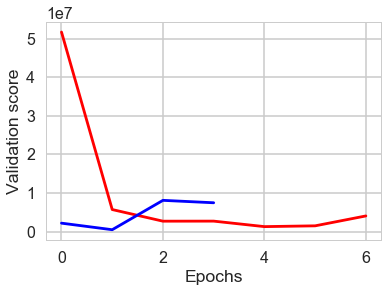

In [70]:
# Create the new model: model_2
model_2 = Sequential()
model_2.add(Dense(1000, activation='relu', input_shape=input_shape))
model_2.add(Dense(1000, activation='relu'))
model_2.add(Dense(1000, activation='relu'))
model_2.add(Dense(1))

# Compile model_2
model_2.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Fit original model
model_1_training = model.fit(predictors, target, validation_split=0.3,  epochs=10, callbacks=[early_stopping_monitor], verbose=False)   
# Fit model_2
model_2_training = model_2.fit(predictors, target, validation_split=0.3,  epochs=10, callbacks=[early_stopping_monitor], verbose=False)
          
# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

In [71]:
model_3 = Sequential()
model_3.add(Dense(1000, activation='relu', input_shape=input_shape))
model_3.add(Dense(1000, activation='relu'))
model_3.add(Dense(1000, activation='relu'))
model_3.add(Dense(1))
model_3.compile(optimizer='adam', loss='MAE', metrics=['accuracy'])
model_3.fit(predictors, target, validation_split=0.3,  epochs=10, callbacks=[early_stopping_monitor])

Train on 98815 samples, validate on 42350 samples
Epoch 1/10
98815/98815 [==============================] - 41s 419us/step - loss: 55593.3301 - acc: 0.0046 - val_loss: 9.8871 - val_acc: 0.0051
Epoch 2/10
98815/98815 [==============================] - 43s 435us/step - loss: 7180.5951 - acc: 0.0047 - val_loss: 23.6648 - val_acc: 0.0051
Epoch 3/10
98815/98815 [==============================] - 43s 435us/step - loss: 99.0770 - acc: 0.0048 - val_loss: 2.0820 - val_acc: 0.0051
Epoch 4/10
98815/98815 [==============================] - 43s 439us/step - loss: 0.0693 - acc: 0.0048 - val_loss: 2.0824 - val_acc: 0.0051
Epoch 5/10
98815/98815 [==============================] - 43s 434us/step - loss: 0.0693 - acc: 0.0048 - val_loss: 2.0820 - val_acc: 0.0051
Epoch 6/10
98815/98815 [==============================] - 43s 434us/step - loss: 0.0693 - acc: 0.0048 - val_loss: 2.0820 - val_acc: 0.0051
Epoch 7/10
98815/98815 [==============================] - 44s 441us/step - loss: 0.0694 - acc: 0.0048 - val

In [74]:
y_pred = model_3.predict(X_valid)
mae = MAE(y_valid, y_pred)
mae

0.069089189865266

In [75]:
model_4 = Sequential()
model_4.add(Dense(1000, activation='relu', input_shape=input_shape))
model_4.add(Dense(1000, activation='relu'))
model_4.add(Dense(1000, activation='relu'))
model_4.add(Dense(1000, activation='relu'))
model_4.add(Dense(1))
model_4.compile(optimizer='adam', loss='MAE', metrics=['accuracy'])
model_4.fit(predictors, target, validation_split=0.3,  epochs=10, callbacks=[early_stopping_monitor])

Train on 98815 samples, validate on 42350 samples
Epoch 1/10
98815/98815 [==============================] - 77s 780us/step - loss: 43833.1125 - acc: 0.0044 - val_loss: 0.5621 - val_acc: 0.0051
Epoch 2/10
98815/98815 [==============================] - 75s 757us/step - loss: 1469.6539 - acc: 0.0048 - val_loss: 2.1364 - val_acc: 0.0051
Epoch 3/10
98815/98815 [==============================] - 67s 680us/step - loss: 0.0691 - acc: 0.0048 - val_loss: 2.1362 - val_acc: 0.0051


In [76]:
y_pred = model_4.predict(X_valid)
mae = MAE(y_valid, y_pred)
mae

0.06923953261467232

In [77]:
model_5 = Sequential()
model_5.add(Dense(1100, activation='relu', input_shape=input_shape))
model_5.add(Dense(1100, activation='relu'))
model_5.add(Dense(1100, activation='relu'))
model_5.add(Dense(1))
model_5.compile(optimizer='adam', loss='MAE', metrics=['accuracy'])
model_5.fit(predictors, target, validation_split=0.3,  epochs=10, callbacks=[early_stopping_monitor])

Train on 98815 samples, validate on 42350 samples
Epoch 1/10
98815/98815 [==============================] - 56s 567us/step - loss: 70786.8534 - acc: 0.0043 - val_loss: 47.9329 - val_acc: 0.0050
Epoch 2/10
98815/98815 [==============================] - 56s 570us/step - loss: 3733.8773 - acc: 0.0048 - val_loss: 16.6886 - val_acc: 0.0051
Epoch 3/10
98815/98815 [==============================] - 58s 589us/step - loss: 108.3011 - acc: 0.0048 - val_loss: 1.5088 - val_acc: 0.0051
Epoch 4/10
98815/98815 [==============================] - 58s 584us/step - loss: 0.0692 - acc: 0.0048 - val_loss: 1.4921 - val_acc: 0.0051
Epoch 5/10
98815/98815 [==============================] - 58s 583us/step - loss: 0.0692 - acc: 0.0048 - val_loss: 1.4921 - val_acc: 0.0051
Epoch 6/10
98815/98815 [==============================] - 58s 587us/step - loss: 0.0692 - acc: 0.0048 - val_loss: 1.4920 - val_acc: 0.0051
Epoch 7/10
98815/98815 [==============================] - 58s 586us/step - loss: 0.0691 - acc: 0.0048 - v

In [78]:
y_pred = model_5.predict(X_valid)
mae = MAE(y_valid, y_pred)
mae

0.06906399914732883